In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

tips = pd.read_csv('../09_Pandas/cuentas.csv')

Seaborn incluye un interesante conjunto de datasets que pueden ser utilizados para probar las distintas visualizaciones. La función disponible para la carga de estos conjuntos de datos es seaborn.load_dataset, devolviendo un dataframe pandas.

In [2]:
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
3,23.68,3.31,Hombre,No,Domingo,Comida,2
4,24.59,3.61,Mujer,No,Domingo,Comida,4


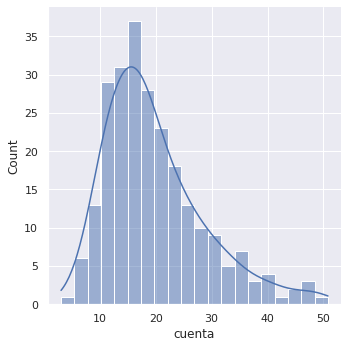

In [3]:
sns.set_theme(style="darkgrid") #todos los gráficos van a tener este estilo
sns.displot(tips['cuenta'], kde = True, bins=20)

<AxesSubplot:xlabel='cuenta', ylabel='Density'>

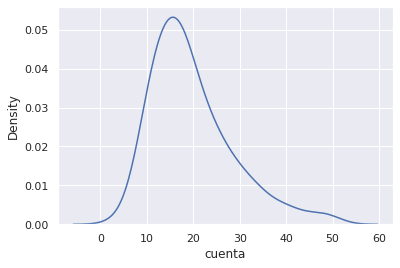

In [4]:
sns.kdeplot(tips['cuenta']) #pintamos solo la estimación

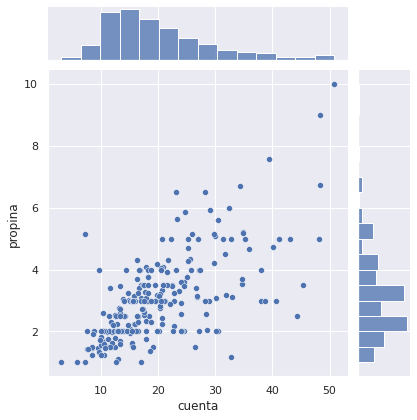

In [5]:
sns.jointplot(x='cuenta', y='propina',data=tips)

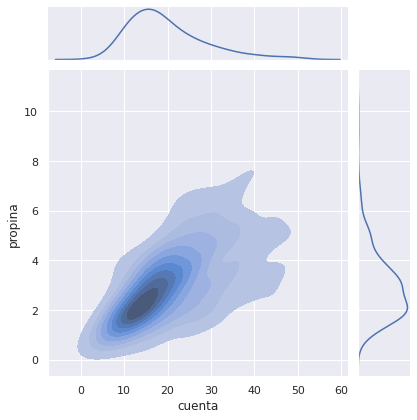

In [6]:
sns.jointplot(x='cuenta', y='propina', data=tips, kind='kde', shade = True)

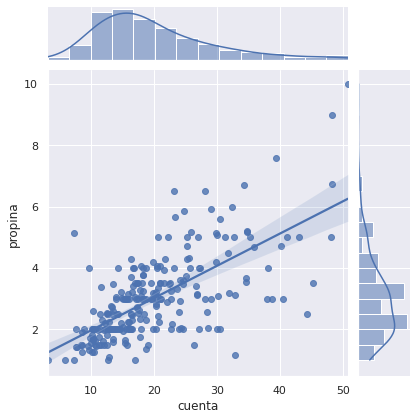

In [7]:
sns.jointplot(x='cuenta', y='propina', data=tips, kind='reg')

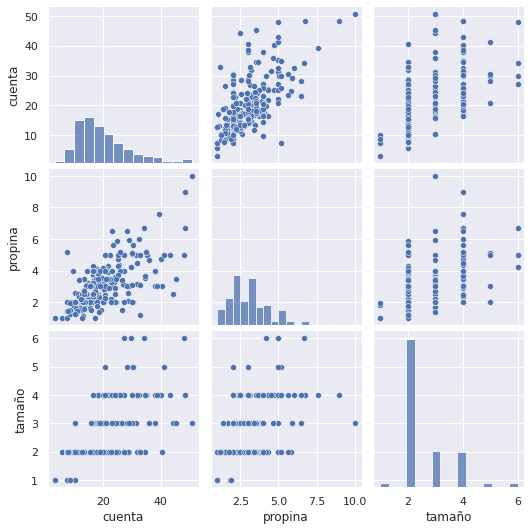

In [8]:
sns.pairplot(tips)

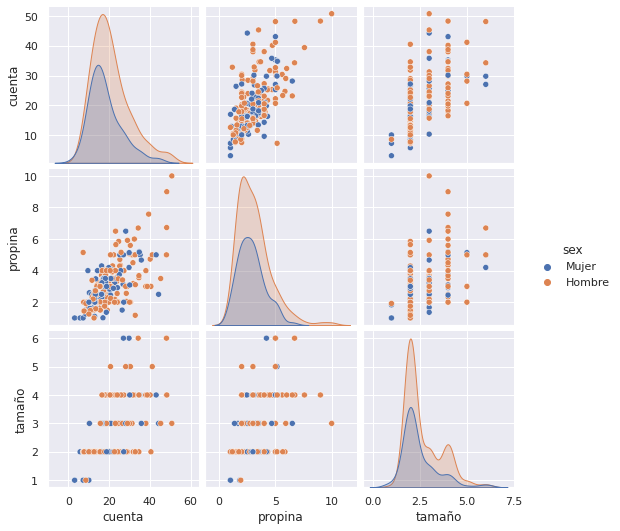

In [9]:
sns.pairplot(tips,hue='sex')

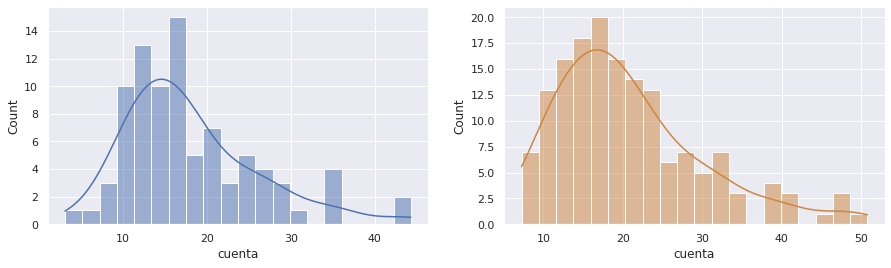

In [10]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15, 4))
sns.histplot(tips[tips['sex']=='Mujer']['cuenta'], kde = True, bins=20, ax=ax1)
sns.histplot(tips[tips['sex']=='Hombre']['cuenta'], kde = True,color='peru', bins=20, ax=ax2)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='cuenta'>

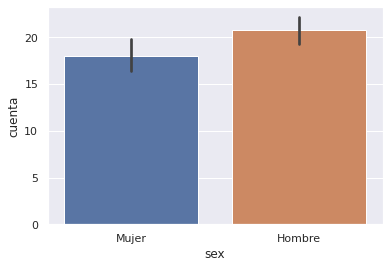

In [11]:
sns.barplot(x = 'sex', y = 'cuenta', data = tips, estimator = np.mean)

<AxesSubplot:xlabel='sex', ylabel='cuenta'>

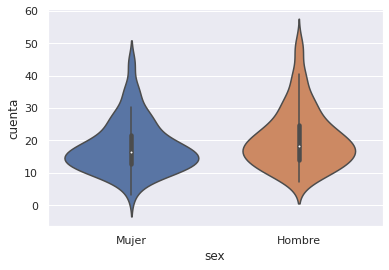

In [12]:
sns.violinplot(x='sex', y='cuenta', data=tips)

<AxesSubplot:xlabel='día', ylabel='cuenta'>

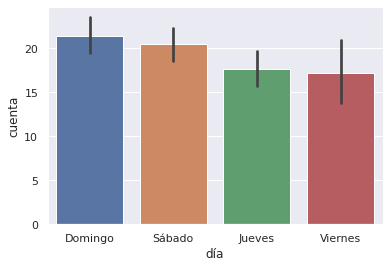

In [13]:
sns.barplot(x='día', y='cuenta', data=tips)

In [14]:
print( "Hombres ",tips[tips['sex']=='Hombre']['cuenta'].mean()," \u00B1 " , tips[tips['sex']=='Hombre']['cuenta'].std())
print( "Mujeres ",tips[tips['sex']=='Mujer']['cuenta'].mean()," \u00B1 ", tips[tips['sex']=='Mujer']['cuenta'].std())

Hombres  20.744076433121016  ±  9.24646876154476
Mujeres  18.056896551724133  ±  8.009208988951961


<AxesSubplot:xlabel='día', ylabel='cuenta'>

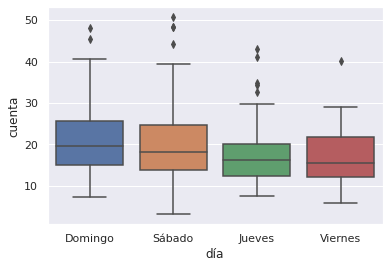

In [15]:
sns.boxplot(x='día', y='cuenta', data=tips)

<AxesSubplot:xlabel='día', ylabel='cuenta'>

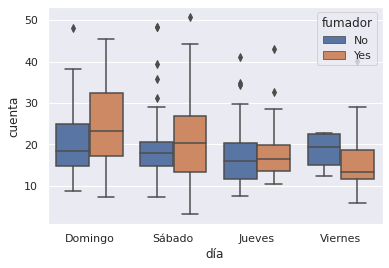

In [16]:
sns.boxplot(x='día', y='cuenta', data=tips, hue='fumador')

<AxesSubplot:xlabel='día', ylabel='cuenta'>

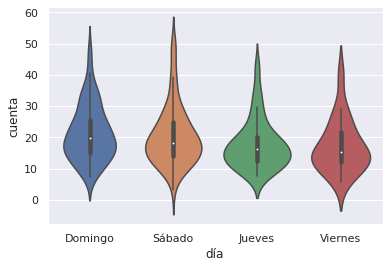

In [17]:
sns.violinplot(x='día', y='cuenta', data=tips)

<AxesSubplot:xlabel='día', ylabel='cuenta'>

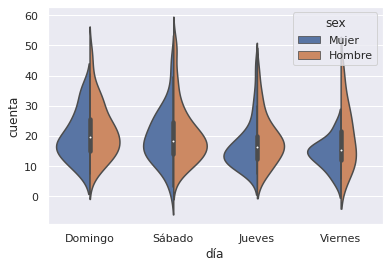

In [18]:
sns.violinplot(x='día', y='cuenta', data=tips, hue='sex', split=True)

<AxesSubplot:xlabel='día', ylabel='cuenta'>

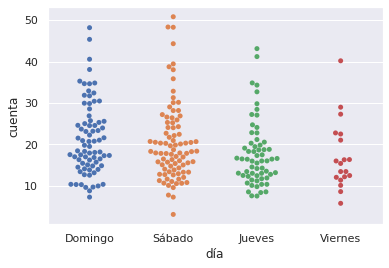

In [19]:
# Nos da la posibilidad de ver todos los puntos que hacen referencia a cada fila del dataset
sns.swarmplot(x='día', y='cuenta', data=tips)

In [ ]:
sns.heatmap(tips.corr(), annot = True)

<AxesSubplot:>

In [ ]:
sns.heatmap(tips.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
tips['col_random'] = np.random.randn(len(tips))
tips['total'] = tips['cuenta'] + tips['propina']
tips.head()

In [ ]:
sns.heatmap(tips.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
tips['col2_random'] = np.random.randn(len(tips))
tips.head()

In [ ]:
sns.heatmap(tips.corr(), annot = True, cmap = 'coolwarm')

Veamos otro ejemplo, imaginemos una material que esta 100ºC en el centro de una superficie cuadrada, tenemos que las paredes estan a 0ºC, es decir:

In [ ]:
A = np.zeros([50,50])
A[int(len(A)/2),int(len(A)/2)] = 100

In [ ]:
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)


Vamos a hacer una difución del calor utilizando solo los 4 primero vecinos, es decir:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph([(1, 2),(1, 2),(1, 3),(1, 4),(1, 5)])
L=1.0
pos = {1: (0, 0), 2: (L, 0), 3: (-L, 0), 4: (0,L), 5: (0,-L)}
options = {"font_size": 12,"node_size": 600,"node_color": "white","edgecolors": "black","linewidths": 3,"width": 3,}
nx.draw_networkx(G, pos, **options)
plt.axis("off")
plt.show()

In [ ]:
#Difundimos el calor
for t in range(100):
    for i in range(1,len(A)-1):
        for j in range(1,len(A)-1):
            A[i][j]=(A[i+1][j]+A[i-1][j]+A[i][j+1]+A[i][j-1])/4
            A[int(len(A)/2),int(len(A)/2)] = 100
            
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(len(A))
Y = np.arange(len(A))
X, Y = np.meshgrid(X, Y)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
surf = ax.plot_surface(X, Y, A, cmap='Reds',linewidth=0)
 

Seaborn tiene incorporados algunos dataset, fijate en el siguiente que contiene información sobre vuelos.

In [ ]:
flights = sns.load_dataset('flights')
flights.tail()

In [ ]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

In [ ]:
sns.heatmap(fp, cmap = 'Blues')

In [ ]:
sns.heatmap(fp, cmap = 'Blues', linecolor = 'white', linewidths = 3)

In [ ]:
# La función clustermap() de seaborn traza un mapa de calor agrupado 
#jerárquicamente del conjunto de datos de matriz dado.

sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Vamos a repetir la caída de calor vista en la teoría con los siguientes cambios:

In [ ]:
N=40
A = np.zeros([N,N])
#Ahora ponemos dos focos de calor en las dos esquinas
A[int(N/2),int(N/2+N/4)] =  100
A[int(N/2),int(N/2-N/4)] =  100
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)

Y utilizamos los 8 primeros vecinos, es decir:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph([(1, 2),(1, 2),(1, 3),(1, 4),(1, 5),(1, 6),(1, 7),(1, 8),(1, 9)])
L=1.0
pos = {1: (0, 0), 2: (L, 0), 3: (-L, 0), 4: (0,L), 5: (0,-L), 6: (-L,-L), 7: (L,-L), 8: (-L,L), 9: (L,L) }
options = {"font_size": 12,"node_size": 600,"node_color": "white","edgecolors": "black","linewidths": 3,"width": 3,}
nx.draw_networkx(G, pos, **options)
plt.axis("off")
plt.show()

In [ ]:
"""Esribe tu código aquí"""

<img src="dos.png" ALIGN="left">

In [ ]:
"""Esribe tu código aquí"""

<img src="dos_3d.png" ALIGN="left">

<hr>
<b><font color='red'>Ejercicio 02</font></b>  
Escribe el código necesario para crear los gráficos que se muestran a continuación.

In [ ]:
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white, ticks
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
"""Esribe tu código aquí"""

<img src="iris.png" ALIGN="left">

In [ ]:
"""Esribe tu código aquí"""

<img src="iris_especies.png" ALIGN="left">

In [ ]:
"""Esribe tu código aquí"""

<img src="iris_corr.png" ALIGN="left">

In [ ]:
"""Esribe tu código aquí"""

<img src="iris_corr_especies.png" ALIGN="left">